In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from skimage import data
import numpy as np
import nibabel
import os

from visualize_mri import VisualizeMRI

- This module illustrate how to visulazie MRI images using visualize_mri.VisualizeMRI class
- Pressing the keys 'q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'a', 's' changes the slices of images
- For each image press of three set of keys work to change the slices
    - 'q', 'w', 'e' for first image
    - 'r', 't', 'y' for second
    - 'u', 'i', 'o' for third
    - 'p', 'a', 's' for fourth qq
- 'q', 'r', 'u', 'p' changes 'sggital' view of first, second, third and fourth image
- 'w', 't', 'i', 'a' chnages 'frontal' view of first, second, third and fourth image
- 'e', 'y', 'o', 's' changes 'transverse' view of first, second, third and fourth image

In [3]:
# Read the image 
struct = nibabel.load(os.path.join('sample_mri.hdr'))
asd = nibabel.load('/Users/1020382/Documents/MachineLearning/DEPI/depi-dataset_01/subject_ASD_1026/anat/anat_mni_2mm.nii.gz')
con = nibabel.load('/Users/1020382/Documents/MachineLearning/DEPI/depi-dataset_01/subject_CON_0019/anat/anat_mni_2mm.nii.gz')
# Get a plain NumPy array, without all the metadata
asd_arr = asd.get_data()
con_arr = con.get_data()
struct_arr = struct.get_data()

In [4]:
asd_arr.shape

(91, 109, 91)

In [5]:
asd_arr.take(indices=1,axis=0).shape

(109, 91)

<IPython.core.display.Javascript object>


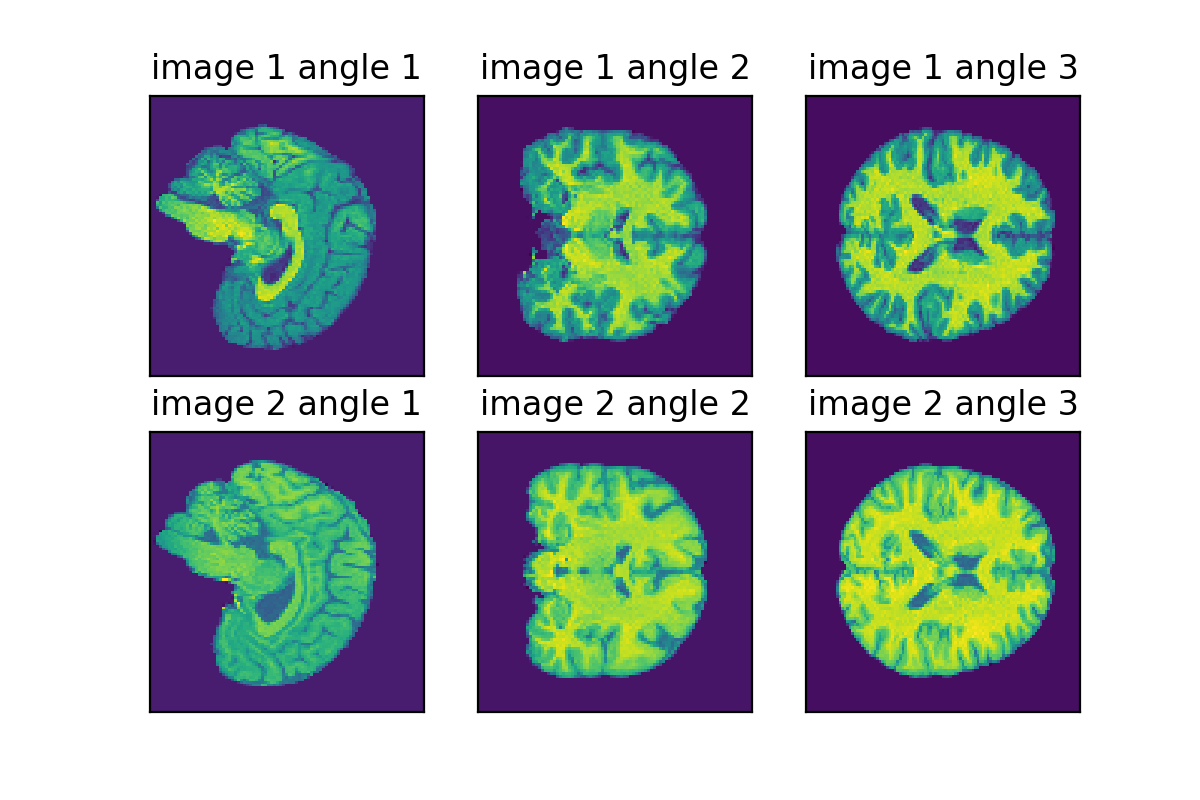

In [7]:
VisualizeMRI([asd_arr, con_arr])

In [8]:
keys = list('qwertyuiopas')
ind = [0, 1, 2]*4
keys_mapping = {k: ind[i] for i, k in enumerate(keys)}

In [10]:
keys_mapping['q']

0

<IPython.core.display.Javascript object>


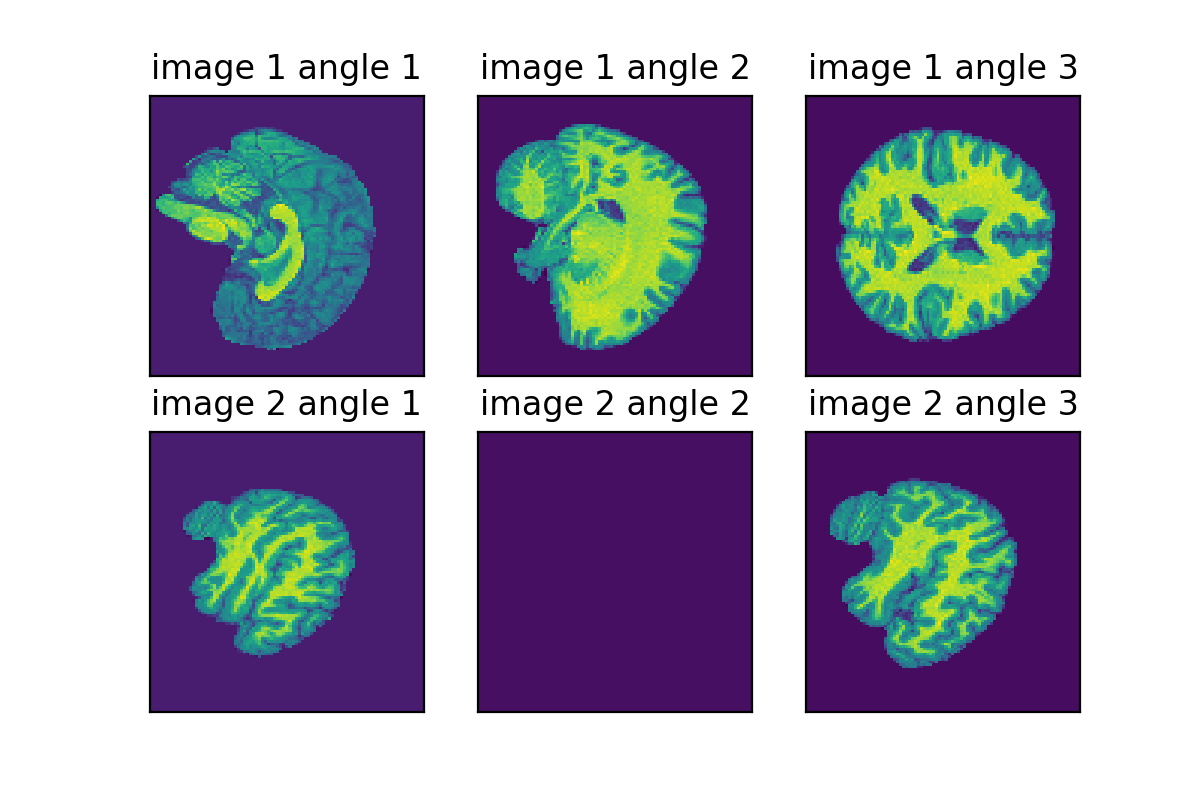

In [9]:
# Visulaizing 1 
VisualizeMRI([asd_arr, asd_arr])

<IPython.core.display.Javascript object>


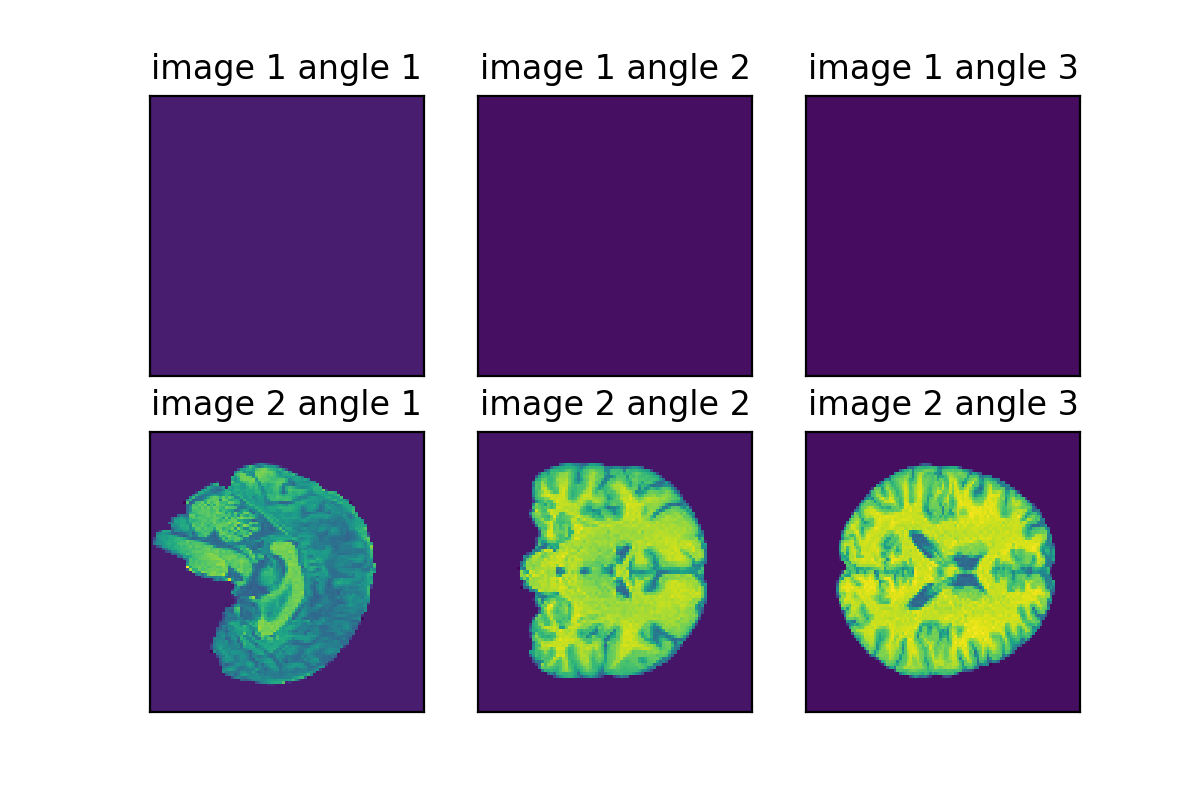

In [6]:
VisualizeMRI([asd_arr, con_arr])

In [11]:
def multi_slice_viwer(image_list):
        fig, ax = plt.subplots(ncols=3, 
                               nrows=len(image_list), 
#                                figsize=self.fig_size[len(self.image_list) - 1],
                              )


        for i, image in enumerate(image_list):
            for k in range(3):
                if len(image_list) > 1:
                    ax_current = ax[i][k]
                else:
                    ax_current = ax[k]
                ax_current.volume = image
                ax_current.index = image.shape[k]//2
                # ax_current.index = 0
                image_slice = image.take(indices=ax_current.index, axis=k)
                ax_current.imshow(image_slice,  aspect='auto')
                ax_current.set_xticks([])
                ax_current.set_yticks([])
                ax_current.set_title("image {} angle {}".format(i + 1, k + 1))
                
        return ax

<IPython.core.display.Javascript object>


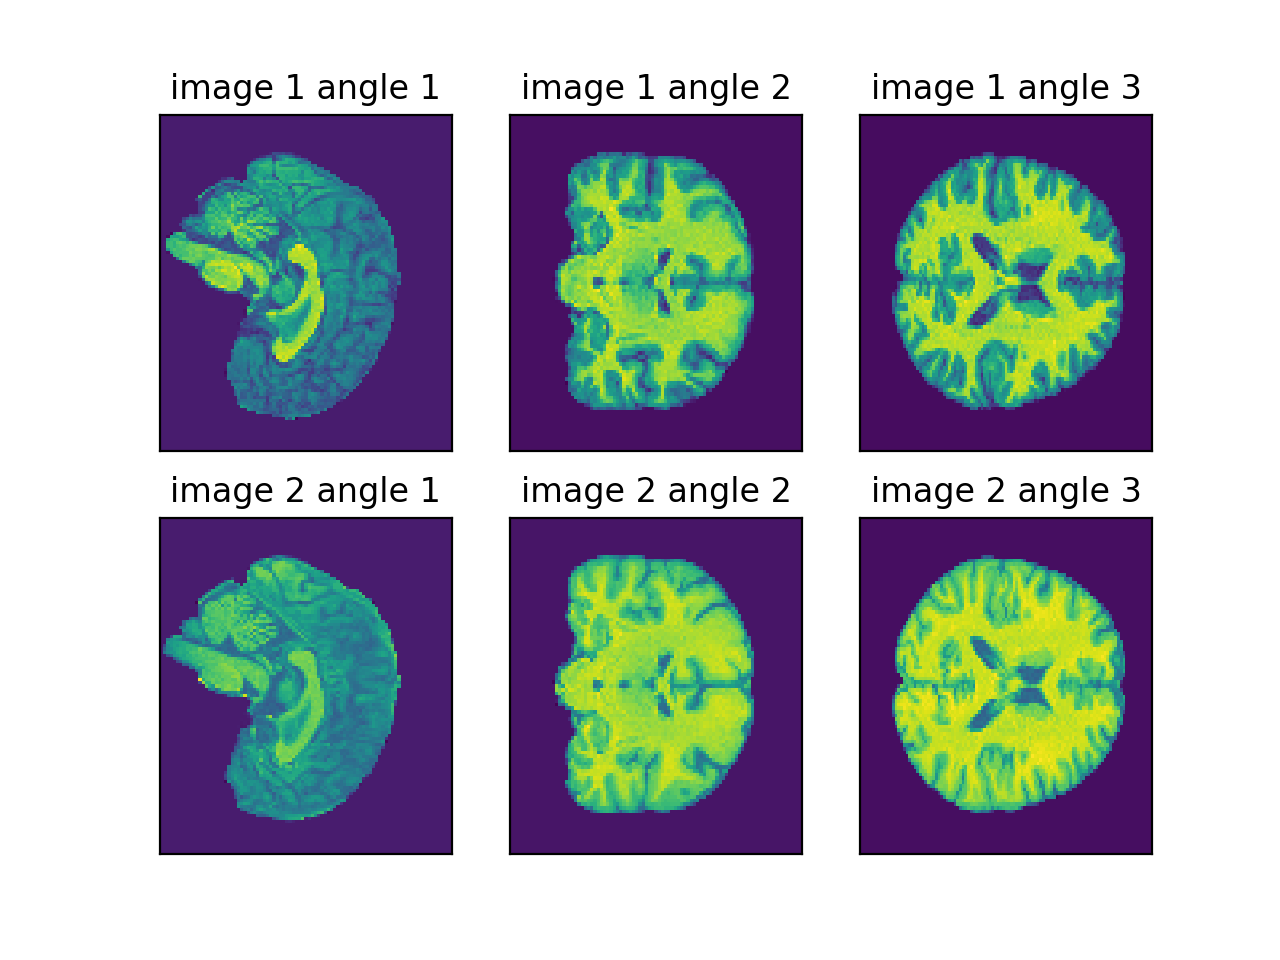

In [12]:
ax = multi_slice_viwer([asd_arr, con_arr])

In [14]:
?ax[0][0].images.set_array

In [13]:
ax[0][0].images[0].set_array(volume[ax.index])

NameError: name 'volume' is not defined

In [30]:
[1,2,3]*3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [28]:
?ax[0][0].images

In [27]:
for i in ax[0][0].images:
    print(i.set_array().shape)

TypeError: set_array() missing 1 required positional argument: 'A'

In [20]:
ax[keys.index('w')]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1199b0dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119a5b6d8>], dtype=object)

In [ ]:
plt.imshow(struct_arr[75])

In [28]:
?plt.imshow

<IPython.core.display.Javascript object>


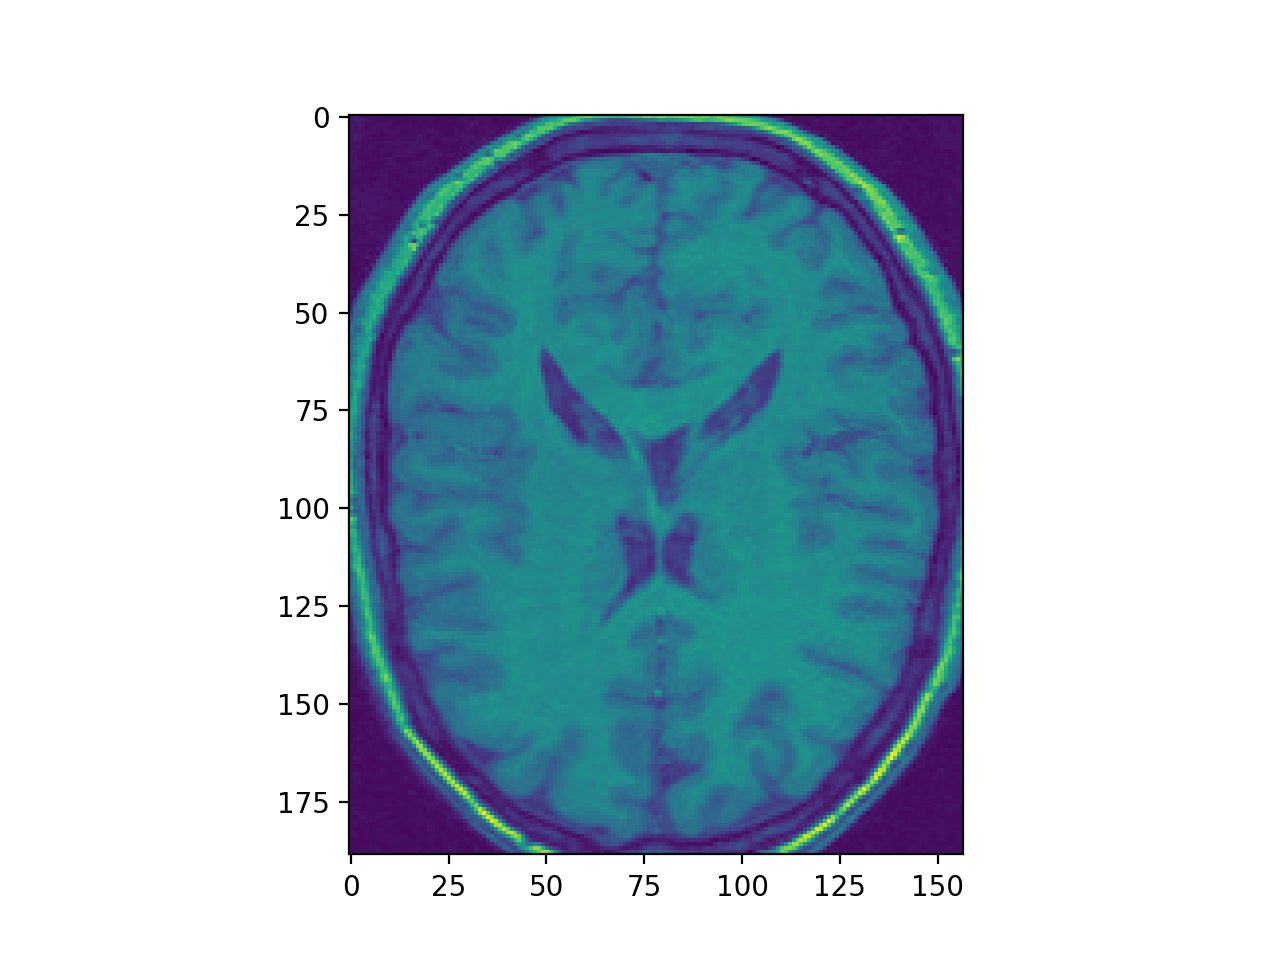

In [31]:
plt.imshow(struct_arr[75], aspect=0.5)

<IPython.core.display.Javascript object>


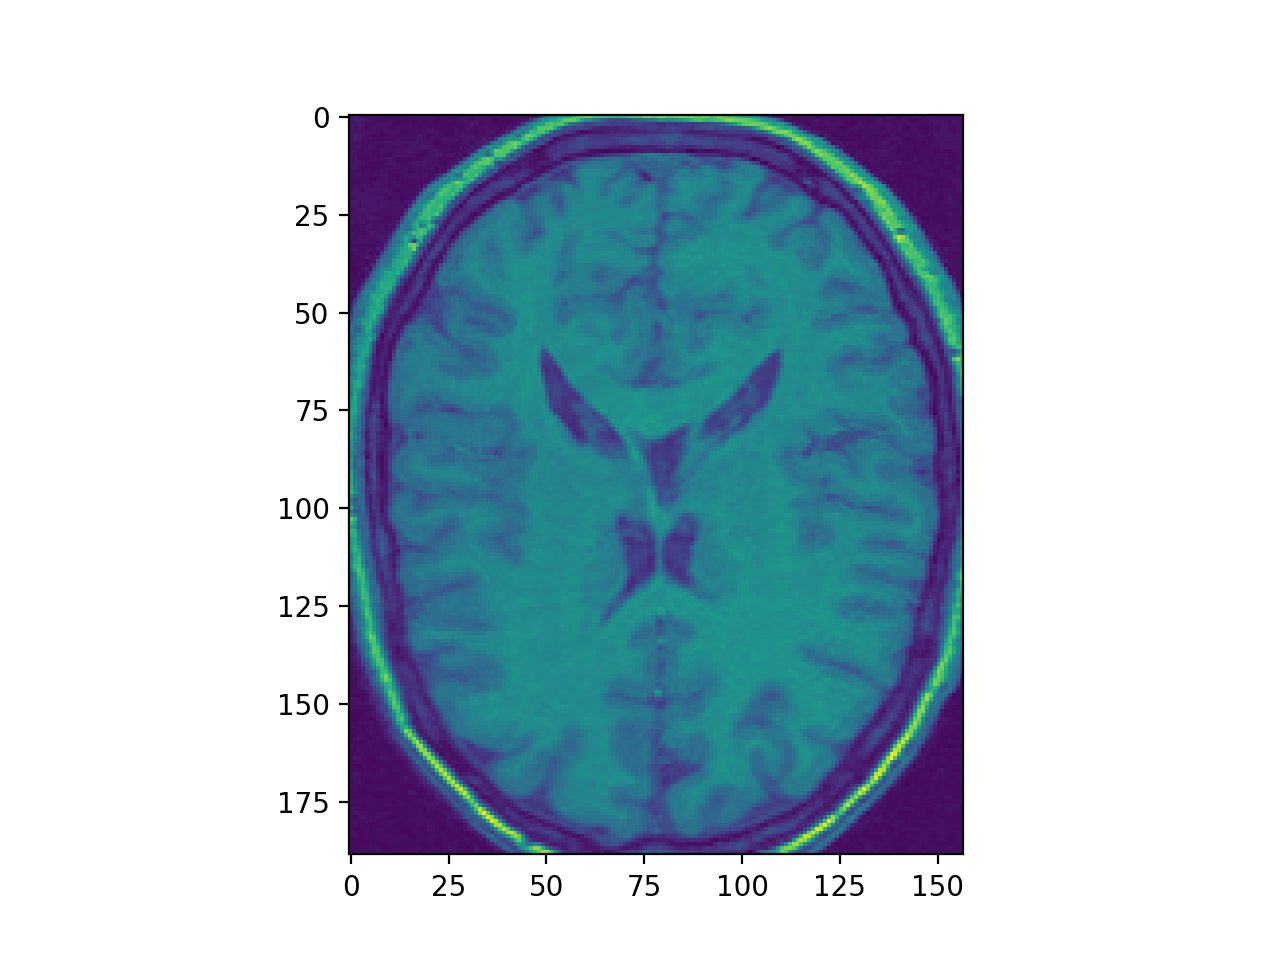

In [33]:
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[34])

In [35]:
struct_arr.shape, struct_arr2.shape

((157, 189, 68), (68, 189, 157))

<IPython.core.display.Javascript object>


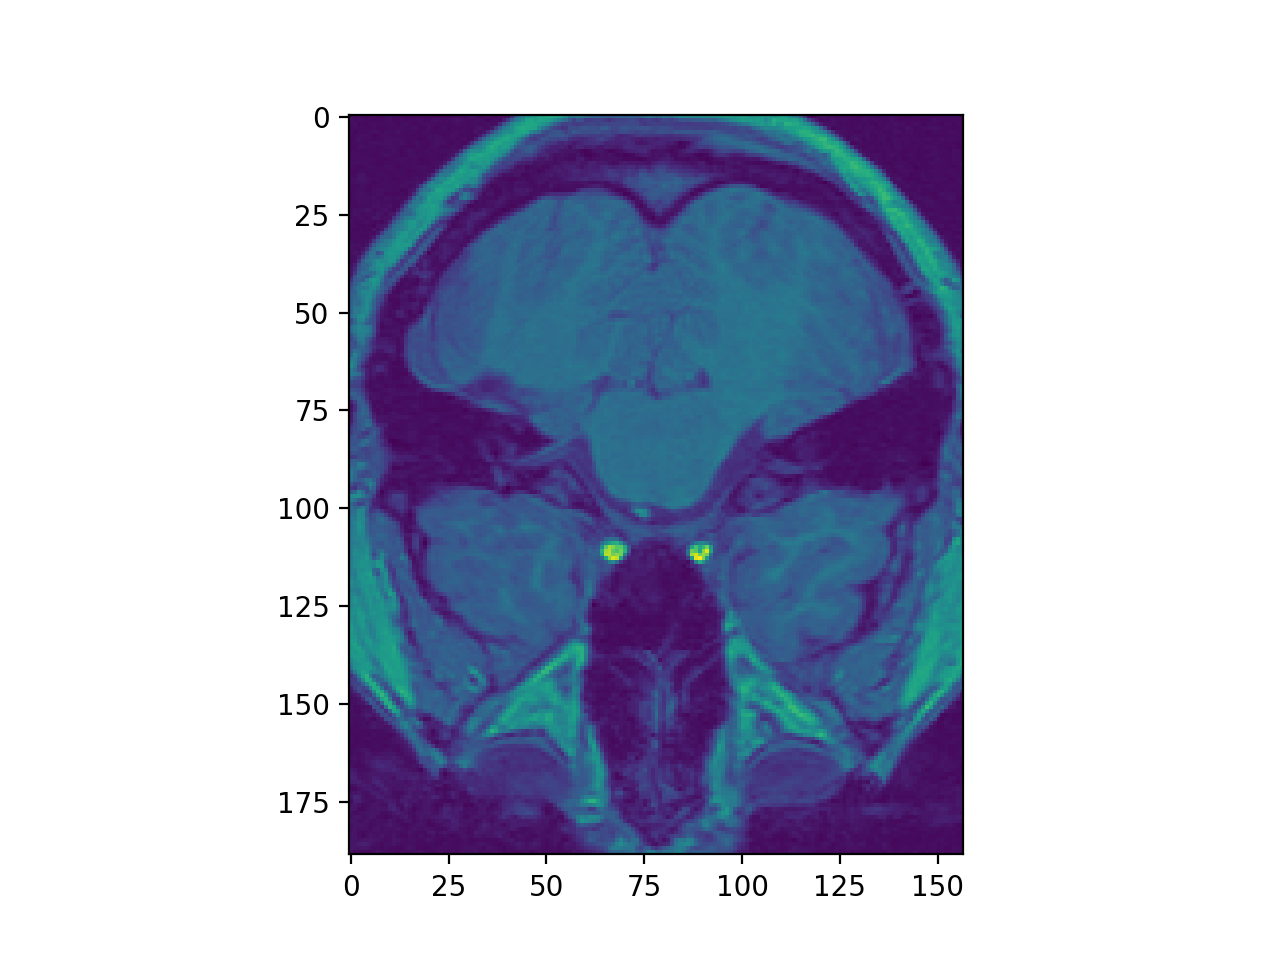

In [50]:
plt.imshow(struct_arr2[5])

In [36]:
def previous_slice():
    pass

def next_slice():
    pass

def process_key(event):
    if event.key == 'j':
        previous_slice()
    elif event.key == 'k':
        next_slice()

In [37]:
struct_arr[..., 43].shape

(157, 189)

<IPython.core.display.Javascript object>


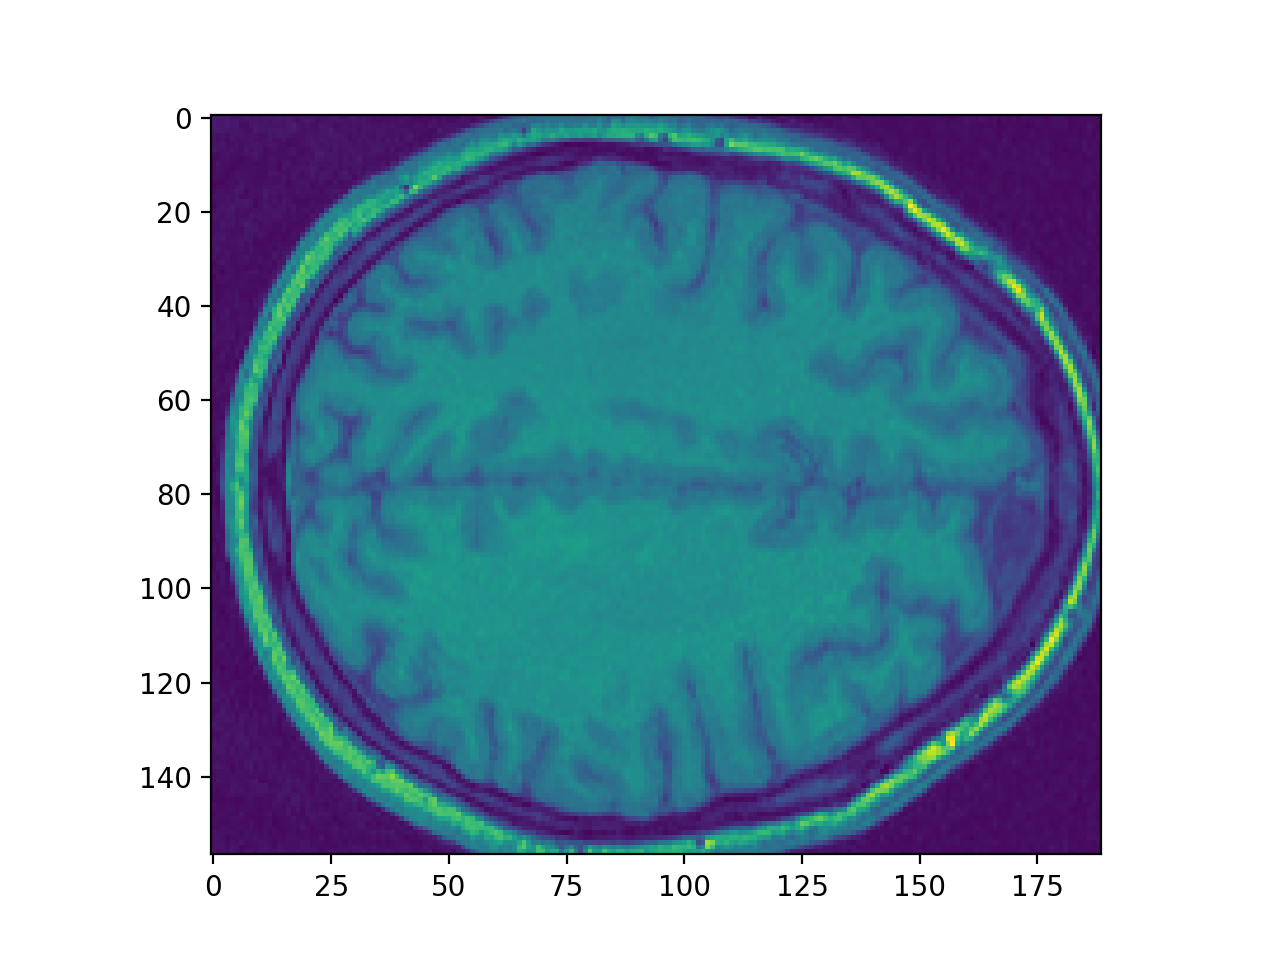

7

In [38]:
fig, ax = plt.subplots()
ax.imshow(struct_arr[..., 43])
fig.canvas.mpl_connect('key_press_event', process_key)

<IPython.core.display.Javascript object>


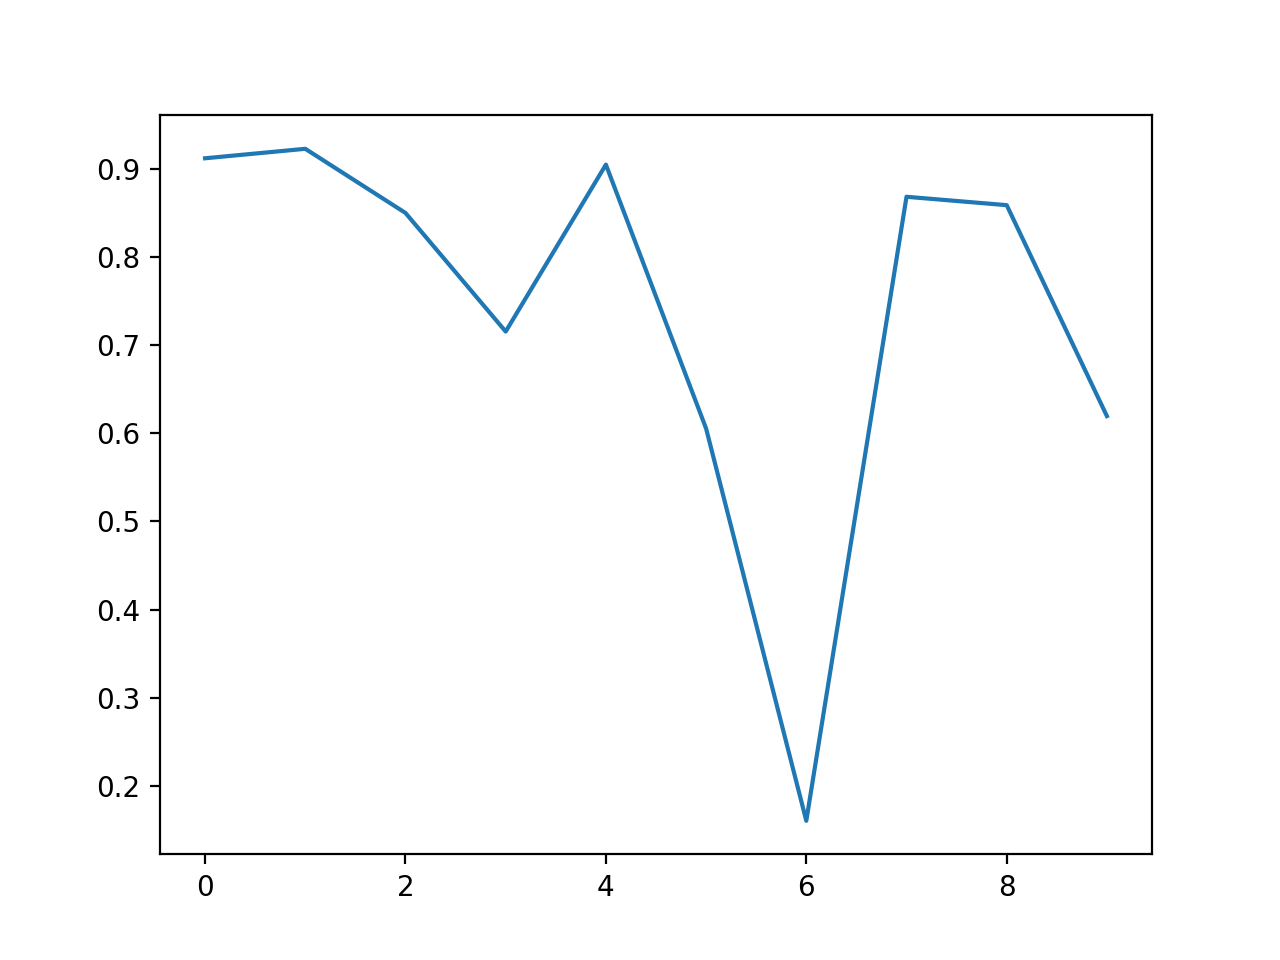

In [41]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [42]:
fig.canvas.mpl_disconnect(cid)

In [47]:
line

<IPython.core.display.Javascript object>


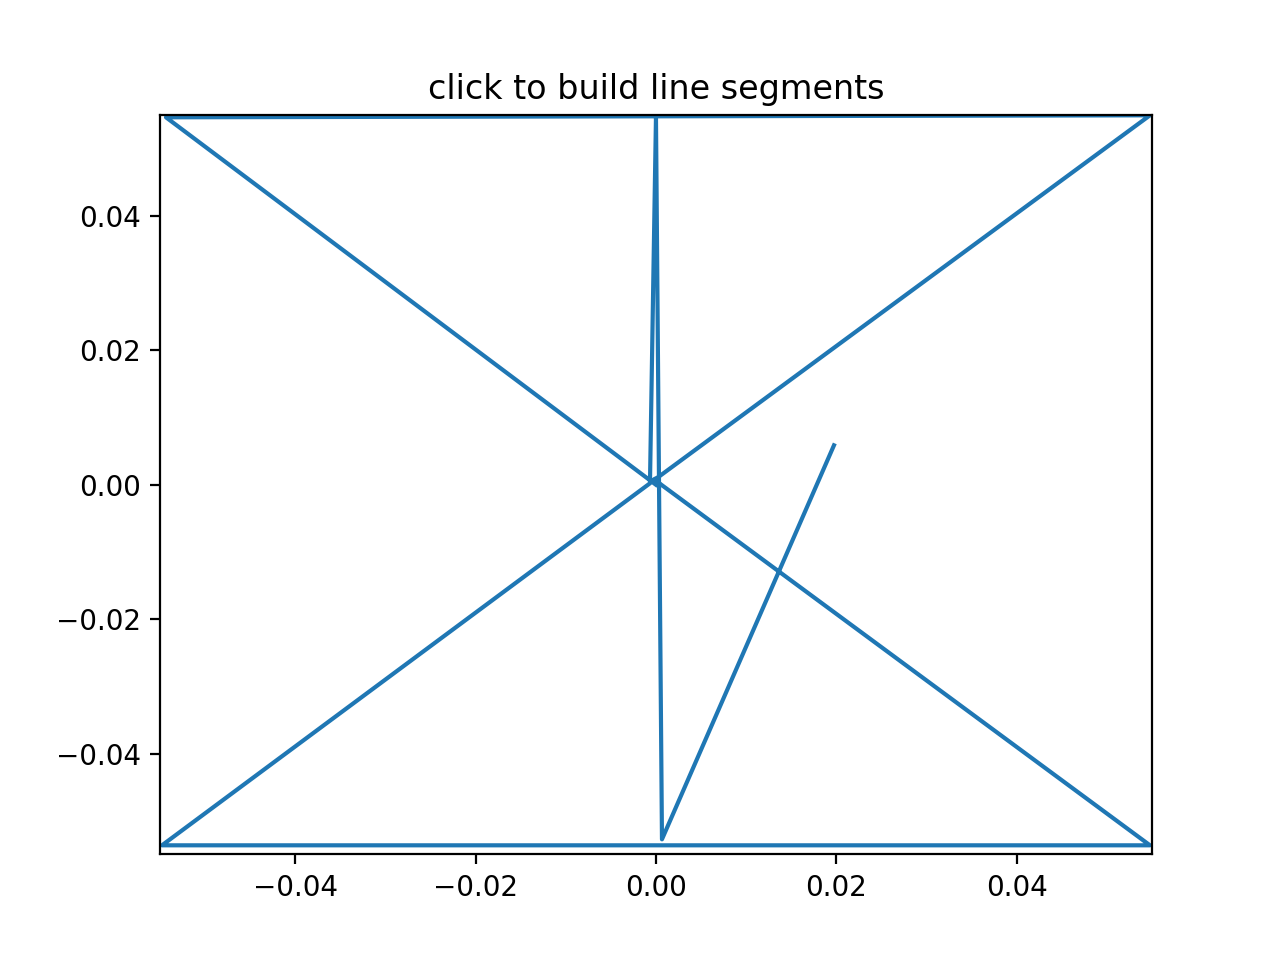

In [48]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()

In [57]:
?rect.figure.canvas.mpl_connect

<IPython.core.display.Javascript object>


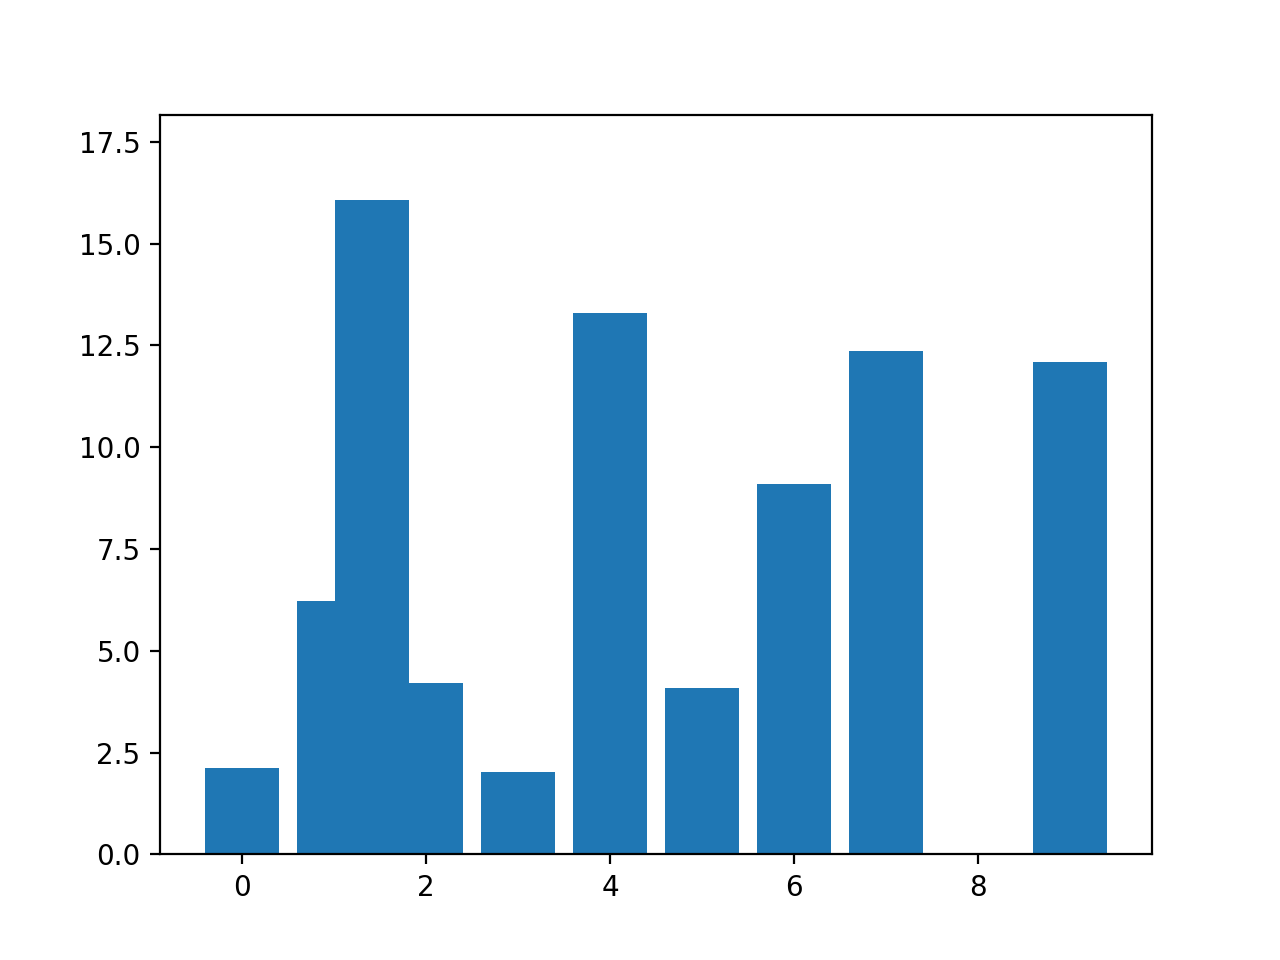

In [50]:
import numpy as np
import matplotlib.pyplot as plt

class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return

        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        #print('x0=%f, xpress=%f, event.xdata=%f, dx=%f, x0+dx=%f' %
        #      (x0, xpress, event.xdata, dx, x0+dx))
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        self.rect.figure.canvas.draw()


    def on_release(self, event):
        'on release we reset the press data'
        self.press = None
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

<IPython.core.display.Javascript object>


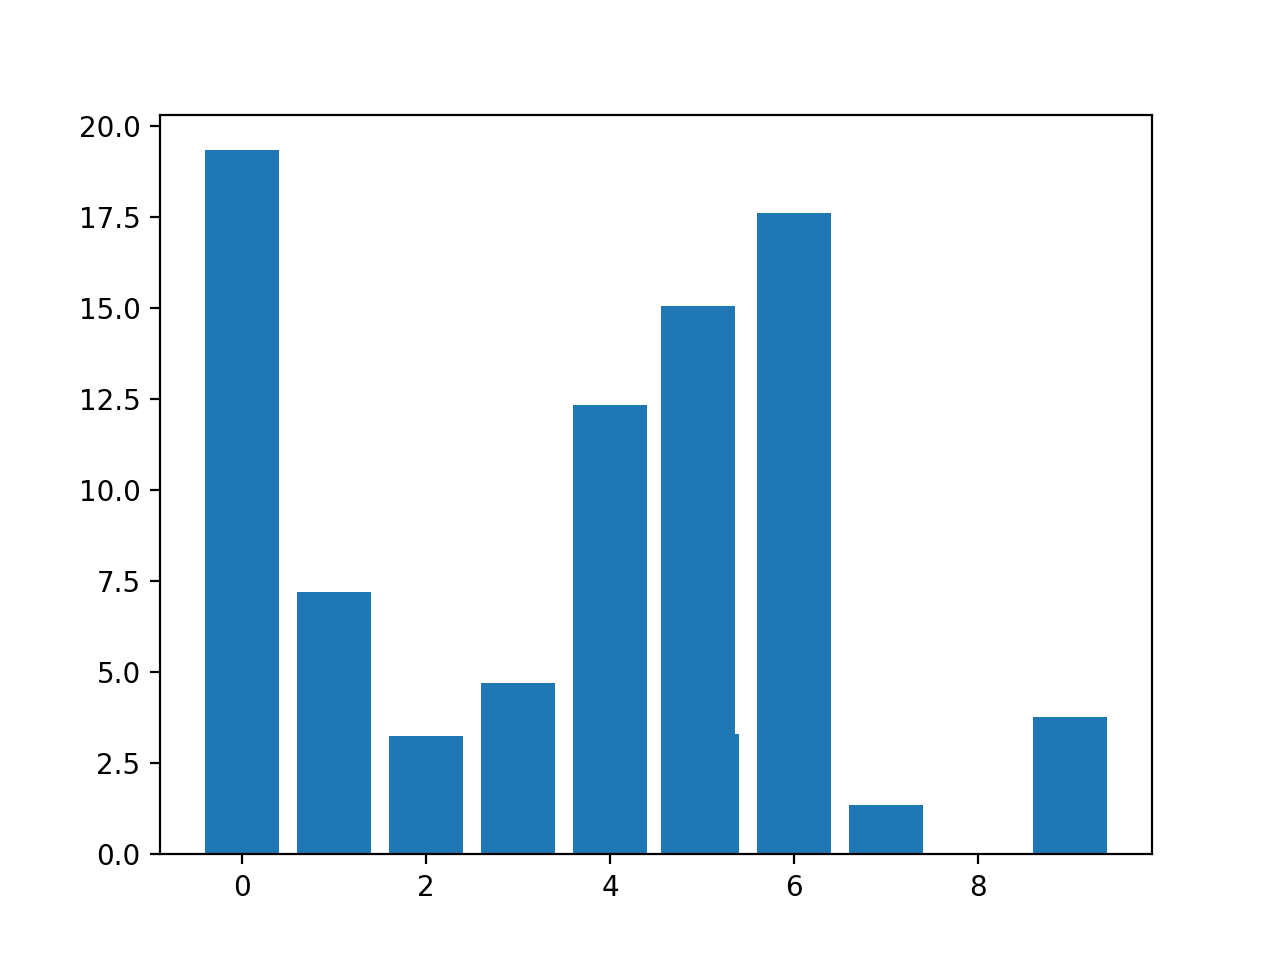

In [58]:
class DraggableRectangle:
    lock = None  # only one can be animated at a time
    def __init__(self, rect):
        self.rect = rect
        self.press = None
        self.background = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return
        if DraggableRectangle.lock is not None: return
        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata
        DraggableRectangle.lock = self

        # draw everything but the selected rectangle and store the pixel buffer
        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        self.rect.set_animated(True)
        canvas.draw()
        self.background = canvas.copy_from_bbox(self.rect.axes.bbox)

        # now redraw just the rectangle
        axes.draw_artist(self.rect)

        # and blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if DraggableRectangle.lock is not self:
            return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        # restore the background region
        canvas.restore_region(self.background)

        # redraw just the current rectangle
        axes.draw_artist(self.rect)

        # blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_release(self, event):
        'on release we reset the press data'
        if DraggableRectangle.lock is not self:
            return

        self.press = None
        DraggableRectangle.lock = None

        # turn off the rect animation property and reset the background
        self.rect.set_animated(False)
        self.background = None

        # redraw the full figure
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

In [66]:
key_board ='qwertyuiopasdfghjklzxcvbnm'

In [67]:
len(key_board)

26

In [64]:
def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


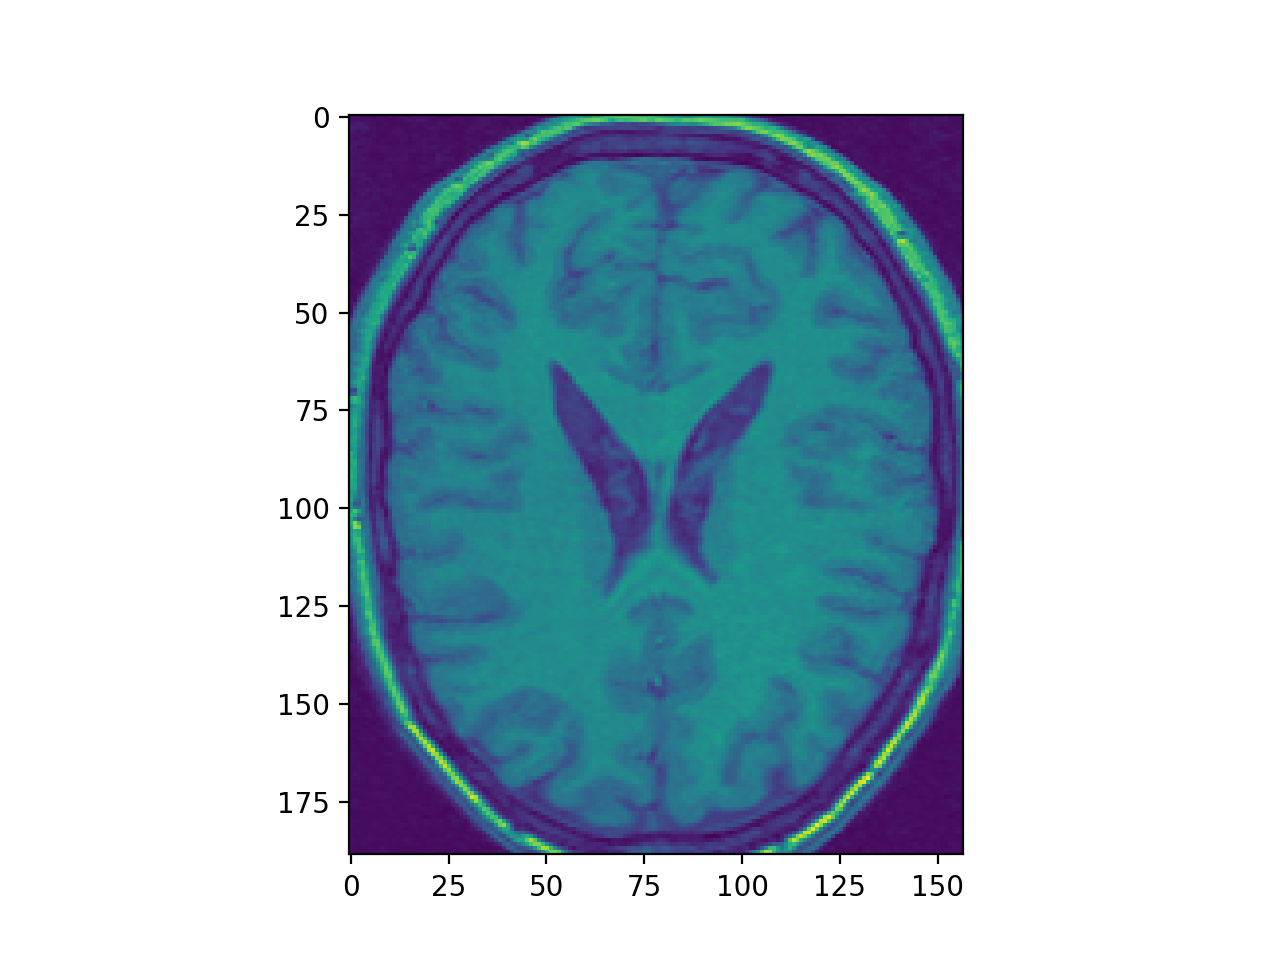

In [65]:
multi_slice_viewer(struct_arr2)

In [86]:
for prop in plt.rcParams:
    if prop.startswith('keymap.'):

        keys = plt.rcParams[prop]

        remove_list = set(keys) & set(['a', 'b'])
        for key in remove_list:
            keys.remove(key)

In [87]:
keys

['p']

In [80]:
plt.rcParams[prop]

'data'

In [81]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [98]:
ax.index

94

In [99]:
struct_arr2.shape

(68, 189, 157)

<IPython.core.display.Javascript object>


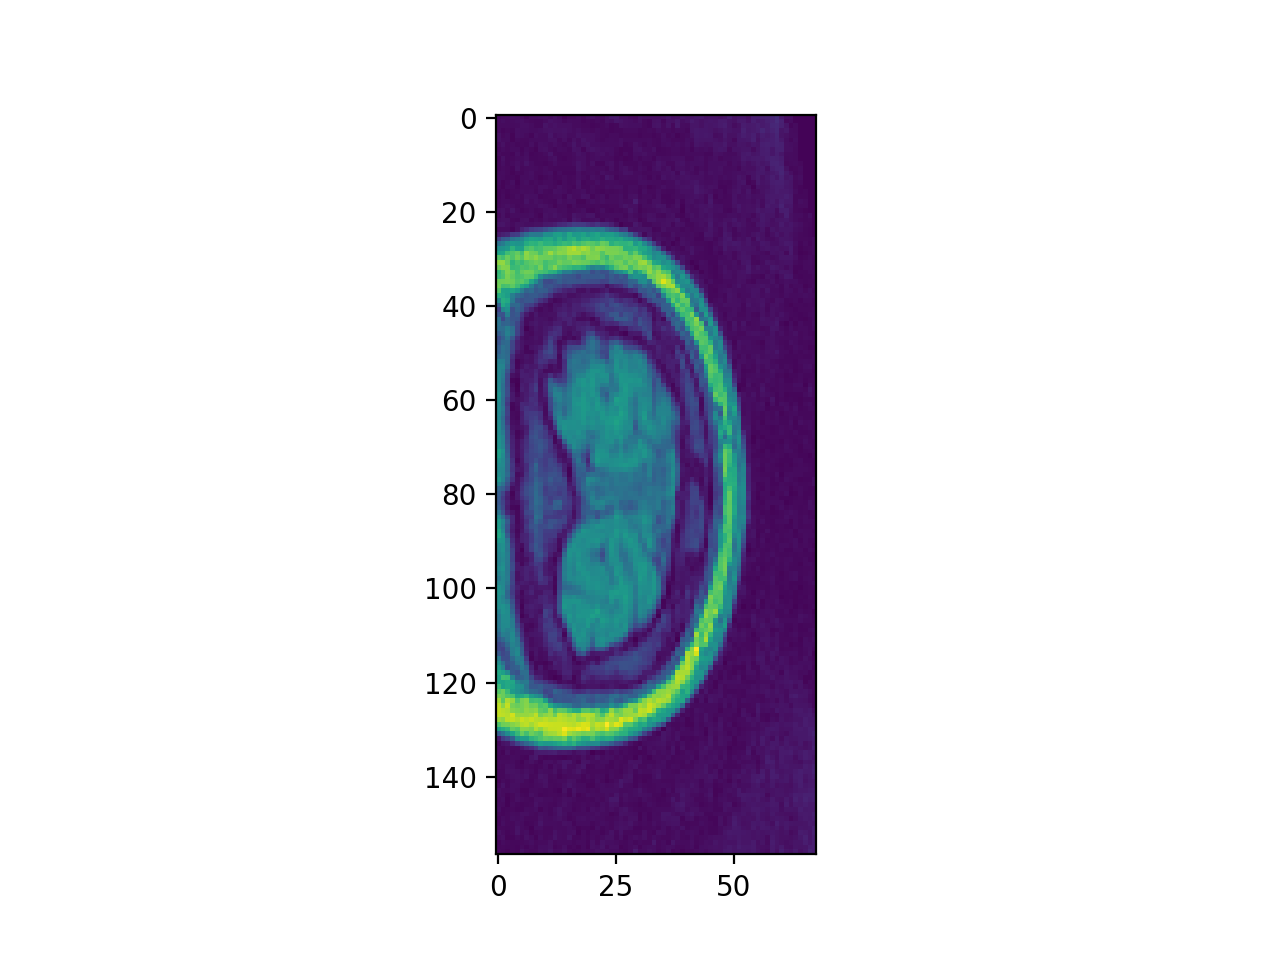

In [107]:
plt.imshow(struct_arr[:,12,:])
plt.show()

<IPython.core.display.Javascript object>


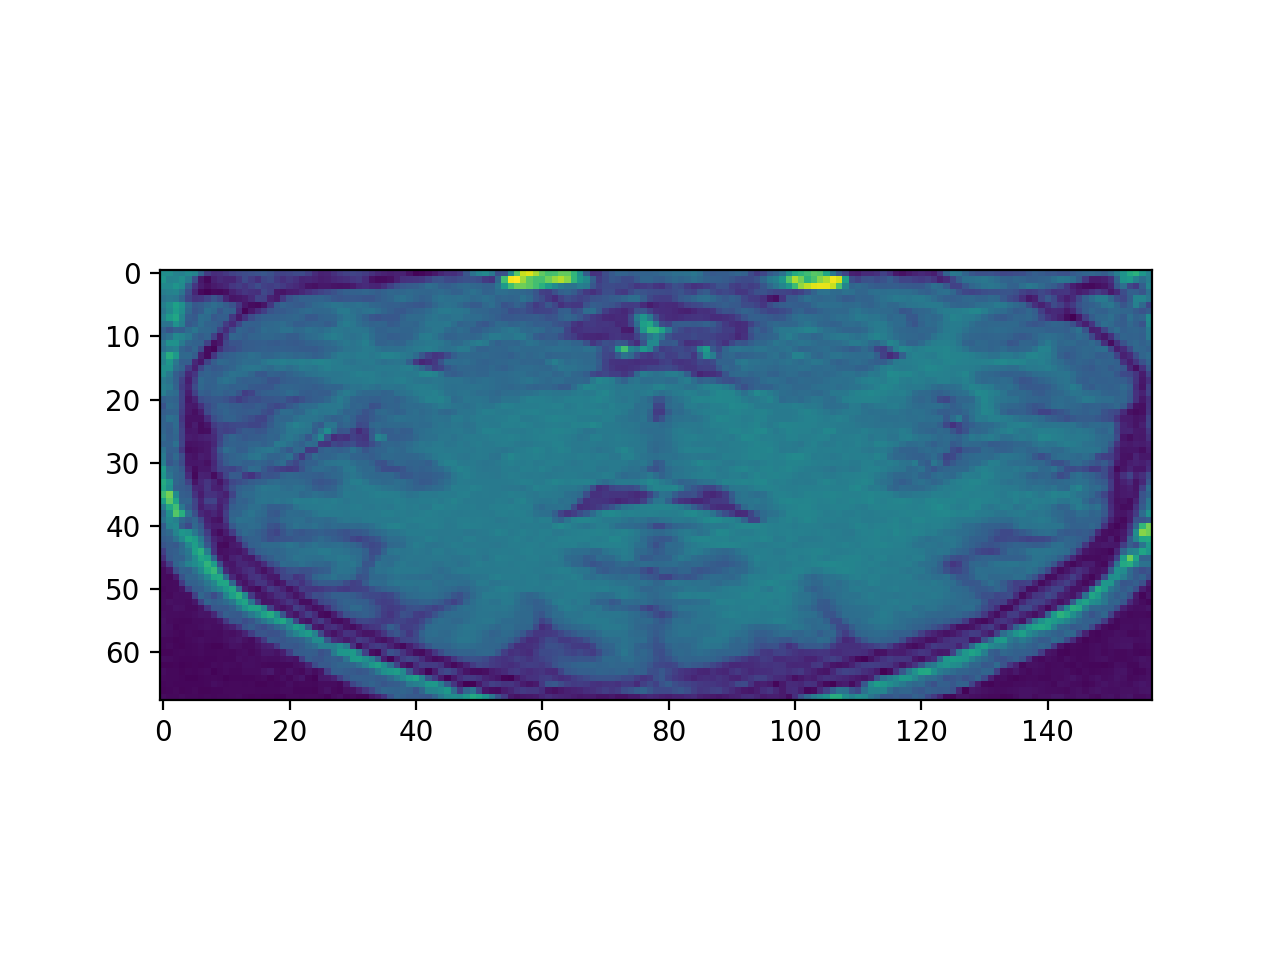

1

In [103]:
fig, ax = plt.subplots()
ax.volume = struct_arr2
ax.index = struct_arr2.shape[1] // 2
ax.imshow(struct_arr2[:,ax.index+10,:])
1

- Create MRI visualize class so as to visualize 4 set of images in one go
- Image change to be done by press of key in 'qwerty' order
- All image change to 1 forward if '1' is pressed and 1 backward if '2' is pressed

In [82]:
a = 'qwerty'

In [83]:
list(a)

['q', 'w', 'e', 'r', 't', 'y']

In [ ]:
0, 1, 2
3, 4, 5
6, 

In [135]:
m = np.arange(2*3*5).reshape((2,3,5))
axis, start, end = 1, 0, 2
target = m[0:2, :, :]
target

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [130]:
m

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [127]:
target.shape

(2, 3, 2)

In [131]:
slc = [slice(None)]*len(m.shape)

In [136]:
slc[0] = slice(0, 1)

In [139]:
slc[0]

slice(0, 1, None)

In [140]:
m[slc].shape

(1, 3, 5)

In [117]:
slice(start, end)

slice(1, 3, None)

In [ ]:
slc = [slice(None)] * len(m.shape)
slc[axis] = slice(start, end)
np.allclose(m[slc], target)

In [109]:
struct_arr[:,:,1].shape

(157, 189)

In [152]:
?plt.subplots

In [229]:
a = [1,2,3]

In [253]:
a=list('qwertyuiopa')

In [ ]:
a[12]

In [264]:
class VisulaizeMRI:
    def __init__(self, image_list):
        if not isinstance(image_list, list):
            image_list = list(image_list)
            
        if len(image_list) > 4:
            raise ValueError("Maximum of 4 images can be analyzed in 1 step")
        
            
        self.fig_size = [(6, 2), (6, 4), (6, 6), (6,8)]
            
        self.image_list = image_list
        self.keys = list('qwertyuiopas')
        self.remove_keymap_conflicts(set(self.keys))
        self.multi_slice_viwer()
        
    def remove_keymap_conflicts(self, new_keys):
        for prop in plt.rcParams:
            if prop.startswith('keymap.'):
                keys = plt.rcParams[prop]
                remove_list = set(keys) & new_keys
                for key in remove_list:
                    keys.remove(key)
                    
    def multi_slice_viwer(self):
        fig, ax = plt.subplots(ncols=3, 
                               nrows=len(self.image_list), 
                               figsize=self.fig_size[len(self.image_list) - 1],
                              )

        
        for i, image in enumerate(self.image_list):
            for k in range(3):
                if len(self.image_list) > 1:
                    ax_current = ax[i][k]
                else:
                    ax_current = ax[k]
                ax_current.volume = image
                ax_current.index = image.shape[k]//2
                ax_current.index = 0
                image_slice = image.take(indices=ax_current.index, axis=k)
                ax_current.imshow(image_slice,  aspect='auto')
                ax_current.set_xticks([])
                ax_current.set_yticks([])
                ax_current.set_title("image {} slice {}".format(i, k))
                
                
            fig.canvas.mpl_connect('key_press_event', self.process_key)    
        
    def process_key(self, event):

        keys_allowed = self.keys[:len(self.image_list)*3-1]
        if event.key not in keys_allowed:
            print("Invalid Key")
        fig = event.canvas.figure
        key_index = self.keys.index(event.key)
        
        ax = fig.axes[key_index]
        next_slice(ax)
        fig.canvas.draw()

    def previous_slice(self, ax):
        volume = ax.volume
        ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
        print(ax.index)
        ax.images[0].set_array(volume[ax.index])

    def next_slice(self, ax):
        volume = ax.volume
        ax.index = (ax.index + 1) % volume.shape[0]
        print(ax.index)
        ax.images[0].set_array(volume[ax.index])





<IPython.core.display.Javascript object>


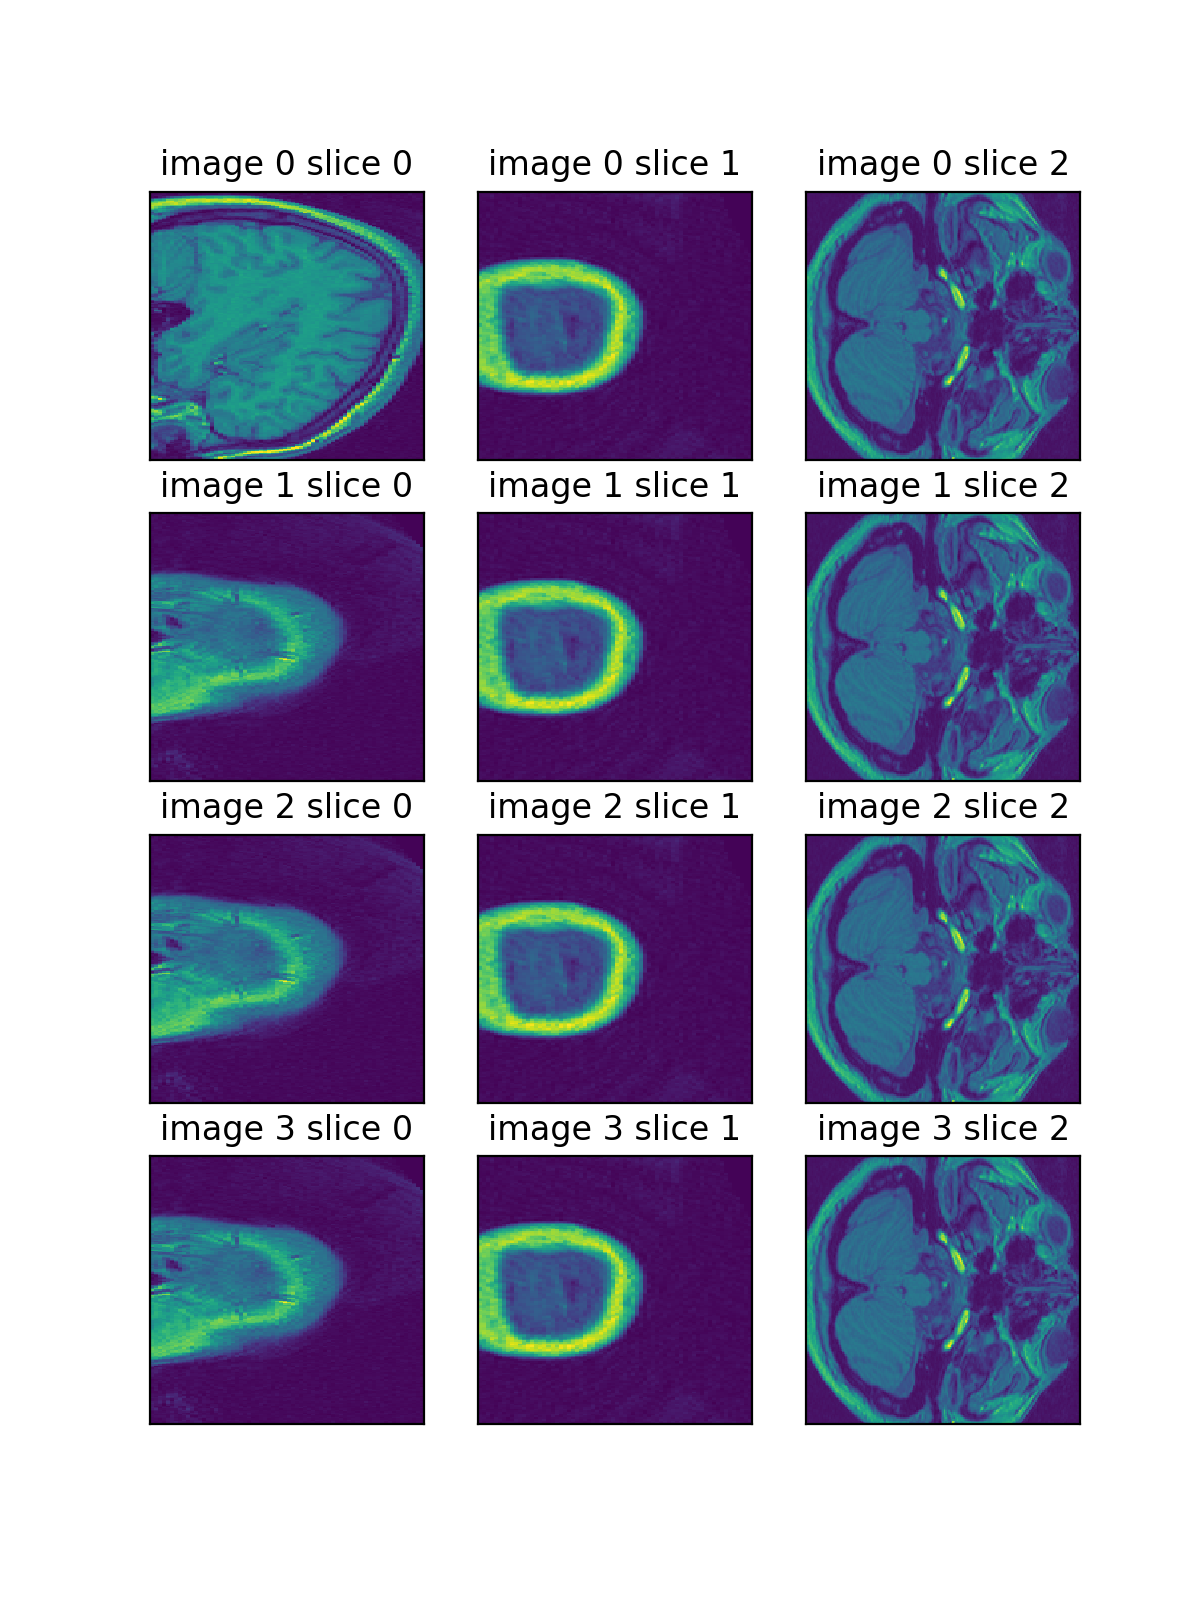

In [265]:
VisulaizeMRI([struct_arr, struct_arr, struct_arr, struct_arr])

In [62]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots(ncols=3, nrows=1)
    
    ax[0].volume = volume
    ax[0].index = volume.shape[0] // 2
    ax[0].imshow(volume[ax[0].index], aspect=0.5)

    ax[1].volume = volume
    ax[1].index = volume.shape[1] // 2
    ax[1].imshow(volume[:,ax[1].index])

    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[1]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    print(ax.index)
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    print(ax.index)
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


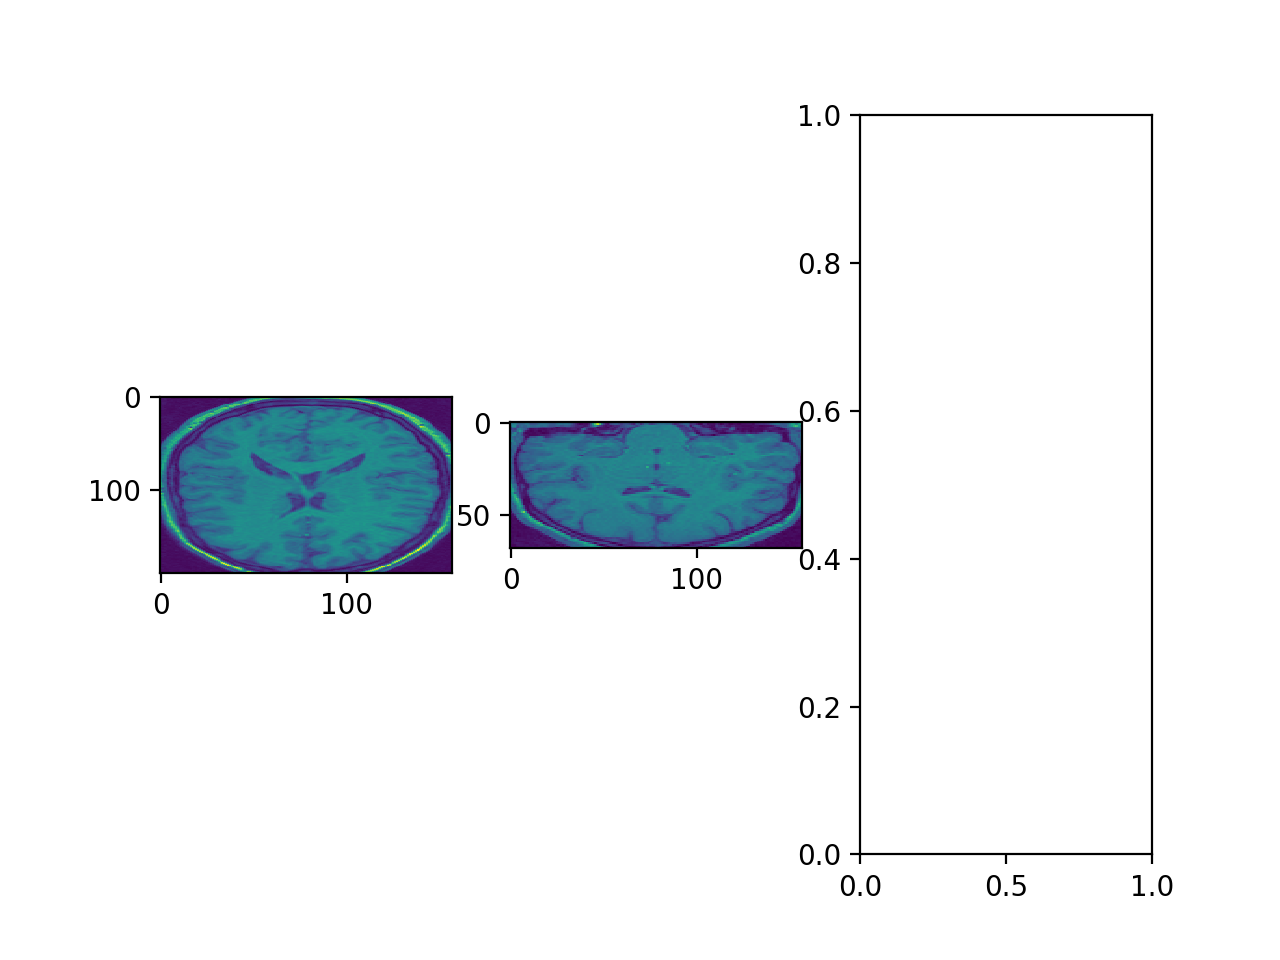

In [63]:
multi_slice_viewer(struct_arr2)